Import the Libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Load dataset

In [5]:
data = load_digits()


Data pre-processing

In [6]:
X = data.images.reshape((len(data.images), -1))


X = X / 16.0 

y = data.target

Split the dataset into 80%-20% ratio

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features by removing the mean and scaling to unit variance

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train with different kernals

In [30]:
svm_model_linear = SVC(kernel='linear').fit(X_train_scaled, y_train)
svm_model_radial = SVC(kernel='rbf', gamma='scale').fit(X_train_scaled, y_train)
svm_model_poly = SVC(kernel='poly', degree=3).fit(X_train_scaled, y_train)

Make prediction with each kernal

In [31]:
y_pred_linear = svm_model_linear.predict(X_test_scaled)
y_pred_radial = svm_model_radial.predict(X_test_scaled)

y_pred_poly = svm_model_poly.predict(X_test_scaled)

Accuracy for each model

In [32]:
print("Accuracy - Linear Kernel:", accuracy_score(y_test, y_pred_linear))
print("Accuracy - Radial Kernel:", accuracy_score(y_test, y_pred_radial))
print("Accuracy - Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))

Accuracy - Linear Kernel: 0.975
Accuracy - Radial Kernel: 0.9805555555555555
Accuracy - Polynomial Kernel: 0.9638888888888889


plot the confusion matrix for each model

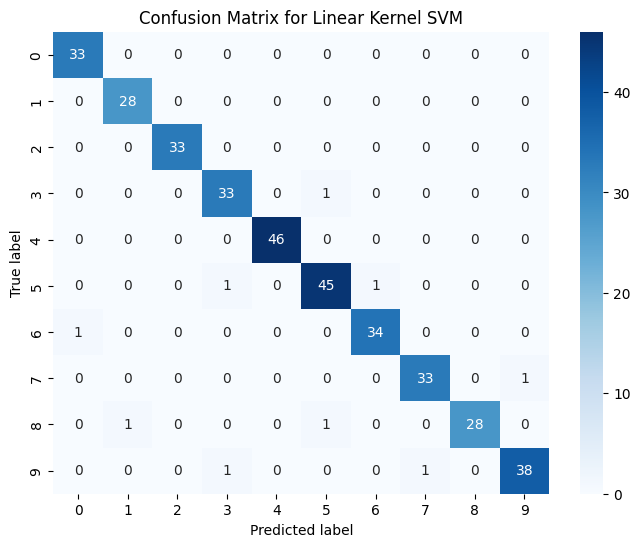

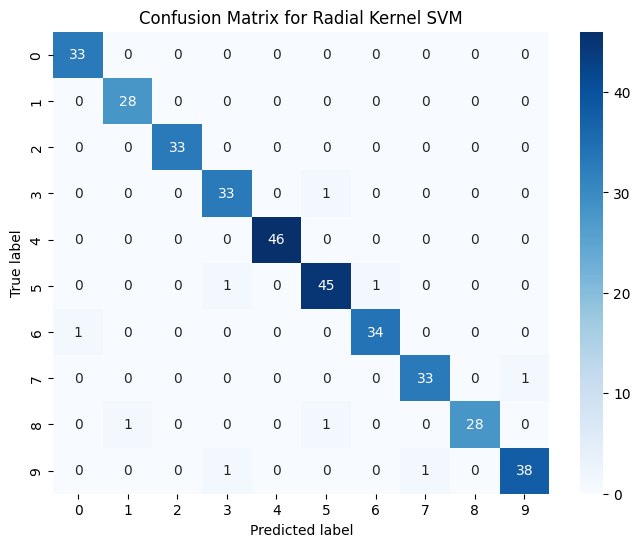

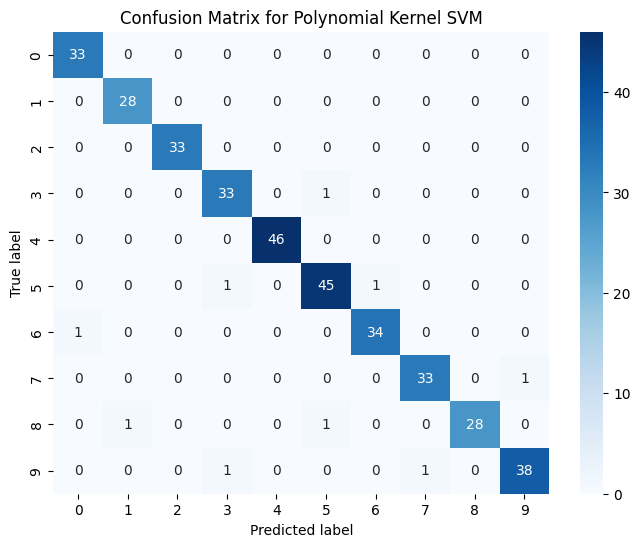

In [46]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {title} Kernel SVM')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
linear_cm= confusion_matrix(y_test,y_pred_linear)
plot_confusion_matrix(linear_cm, 'Linear')

radial_cm= confusion_matrix(y_test,y_pred_radial)
plot_confusion_matrix(linear_cm, 'Radial')

polynomial_cm= confusion_matrix(y_test,y_pred_poly)
plot_confusion_matrix(linear_cm, 'Polynomial')

hyper parameter tuning

In [47]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy', n_jobs=3)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=3,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]},
             scoring='accuracy')

Print the best parameters and model

In [48]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 100, 'gamma': 0.01}


heat map and grid search

In [49]:
scores_matrix = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']),

                                                                   len(param_grid['gamma'])
                                                                   )

plotting the heatmap

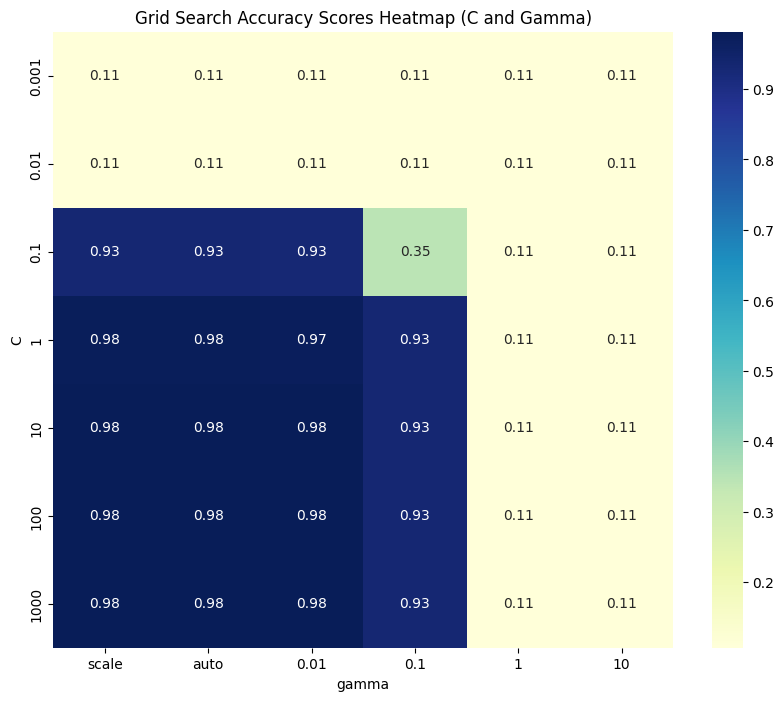

In [52]:
# Here, we are selecting a specific 'gamma' and 'coef0' to visualize as an example
plt.figure(figsize=(10, 8))
sns.heatmap(scores_matrix, annot=True, cmap='YlGnBu', 
            xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.title('Grid Search Accuracy Scores Heatmap (C and Gamma)')
plt.xlabel('gamma')
plt.ylabel('C')
plt.show()

Evaluating the tuned model

In [53]:
best_svm_model = grid_search.best_estimator_
y_pred_tuned = best_svm_model.predict(X_test_scaled)

Training accuracy

In [54]:

print("Accuracy - Tuned Radial Kernel:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report - Tuned Radial Kernel:")
print(classification_report(y_test, y_pred_tuned))



Accuracy - Tuned Radial Kernel: 0.9805555555555555
Classification Report - Tuned Radial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Plotting confusion matrix for the tuned model

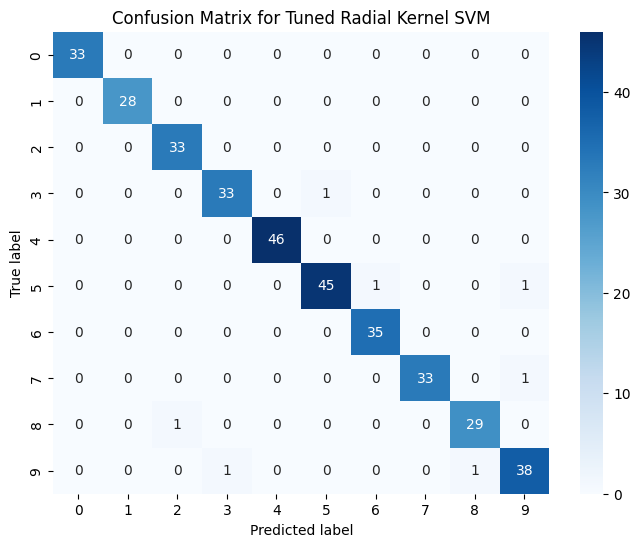

In [55]:
tuned_cm = confusion_matrix(y_test, y_pred_tuned)
plot_confusion_matrix(tuned_cm, 'Tuned Radial')

Comparing every models with the tuned model

In [56]:
print("Initial Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Initial Radial Kernel Accuracy:", accuracy_score(y_test, y_pred_radial))
print("Initial Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Tuned Radial Kernel Accuracy:", accuracy_score(y_test, y_pred_tuned))

Initial Linear Kernel Accuracy: 0.975
Initial Radial Kernel Accuracy: 0.9805555555555555
Initial Polynomial Kernel Accuracy: 0.9638888888888889
Tuned Radial Kernel Accuracy: 0.9805555555555555
